In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv("/Users/syamilzaiman/Desktop/Carsome/car.csv")

In [3]:
cars.head()

,Car Year,Car Brand,Car Model,Car Engine,Car Transmission,Reserve Price,Winning Price,Bidded Date
0,1998,Brand-18,Model-72,1.6,Auto,3300,5800,1/6/2020
1,2004,Brand-18,Model-72,1.7,Auto,14000,14500,1/6/2020
2,2004,Brand-19,Model-97,1.3,Auto,3300,3800,1/6/2020
3,2004,Brand-47,Model-336,2.4,Auto,33800,36800,1/6/2020
4,2005,Brand-18,Model-73,1.5,Auto,8000,8700,1/6/2020


In [4]:
cars['premium'] = cars['Winning Price']-cars['Reserve Price']

In [5]:
cars.head()

,Car Year,Car Brand,Car Model,Car Engine,Car Transmission,Reserve Price,Winning Price,Bidded Date,premium
0,1998,Brand-18,Model-72,1.6,Auto,3300,5800,1/6/2020,2500
1,2004,Brand-18,Model-72,1.7,Auto,14000,14500,1/6/2020,500
2,2004,Brand-19,Model-97,1.3,Auto,3300,3800,1/6/2020,500
3,2004,Brand-47,Model-336,2.4,Auto,33800,36800,1/6/2020,3000
4,2005,Brand-18,Model-73,1.5,Auto,8000,8700,1/6/2020,700


In [7]:
cars1=cars

In [81]:
len(cars1)

24381

In [8]:
cars1.drop(columns=['Car Year', 'Car Brand', 'Car Model', 'Car Engine', 'Car Transmission'], inplace=True)

In [10]:
cars1.drop(columns='Bidded Date', inplace=True)
#forgot to also drop bidded date

In [11]:
cars1

,Reserve Price,Winning Price,premium
0,3300,5800,2500
1,14000,14500,500
2,3300,3800,500
3,33800,36800,3000
4,8000,8700,700
...,...,...,...
24376,76800,80400,3600
24377,70000,75300,5300
24378,166300,166400,100
24379,63800,66300,2500


- To investigate the efficiency of the auction system, the premium from the winning price based on the reserve price should be analysed. Too high of a premium might indicate an inefficient method of setting reserve price
- Also, i realised that there are some negative premiums even though it was mentioned in the pdf file describing Carsome's auction system that the car will be sold at the highest bid IF AND ONLY IF it exceed the reserve price. Therefore, further investigation is required

In [12]:
cars1['% premium'] = (cars1['premium']/cars1['Reserve Price'])*100
cars1.head()

,Reserve Price,Winning Price,premium,% premium
0,3300,5800,2500,75.757576
1,14000,14500,500,3.571429
2,3300,3800,500,15.151515
3,33800,36800,3000,8.875740
4,8000,8700,700,8.750000


In [23]:
average_premium = cars1['% premium'].sum()/len(cars1)
average_premium

44.46874396725401

In [17]:
#finding total cars that were sold below reserve price
negative_premium = 0
for k in cars1['premium']:
    if k<0:
        negative_premium += 1

In [18]:
negative_premium

800

In [25]:
negative_premium_percentage = (negative_premium/len(cars1))*100
negative_premium_percentage

3.2812435913211107

- 3.3% of cars were sold below their reserve price which is against the condition set by Carsome
- This may be due to sellers over valuing their cars hence negative premiums

In [30]:
cars1['% premium'].value_counts()

0.000000     382
10.000000    245
20.000000    116
1.000000     101
1.666667      90
            ... 
8.942065       1
78.737542      1
12.359551      1
54.639175      1
19.298246      1
Name: % premium, Length: 8347, dtype: int64

In [31]:
cars1['% premium'].value_counts().sort_index()

-11.022044       1
-11.012236       2
-10.963455       6
-10.808081       2
-10.796074       1
                ..
 35100.000000    1
 42100.000000    1
 42200.000000    1
 65200.000000    1
 85200.000000    1
Name: % premium, Length: 8347, dtype: int64

- Noticed that some cars were sold with huge premiums which might i.e. some sold for an 85200% premium

- I defined an abnormal premium as premiums more than 100% as it is not normal to get this high of premium unless sellers want to implement an underpricing strategy 

In [32]:
#finding total cars that were sold >100% of reserve price
abnormal_premium = 0
for k in cars1['% premium']:
    if k>100:
        abnormal_premium += 1

In [33]:
abnormal_premium

1178

In [36]:
abnormal_premium_percentage = (abnormal_premium/len(cars1))*100
abnormal_premium_percentage

4.831631188220335

- close to 5% of cars were sold for more than double their reserve price. Any particular reason for this?
- to dive deeper on how skewed the abnormal premiums are, it would be interesting to find out how many cars were sold 10 times above their reserve price

In [37]:
super_abnormal_premium = 0
for k in cars1['% premium']:
    if k>1000:
        super_abnormal_premium += 1

In [80]:
super_abnormal_premium

22

In [39]:
super_abnormal_premium_percentage = (super_abnormal_premium/len(cars1))*100
super_abnormal_premium_percentage

0.09023419876133054

- It might be a good idea to exclude cars with negative returns and abnormal premiums(which are defined as premiums>100%) to find a 'better' average premium percentage of cars sold. This would help measure the 'true' efficiency of the pricing system.

In [63]:
cars2=cars1[cars1['% premium']>=0]

In [64]:
cars2=cars2[cars2['% premium']<=100]

In [60]:
cars2

,Reserve Price,Winning Price,premium,% premium
0,3300,5800,2500,75.757576
1,14000,14500,500,3.571429
2,3300,3800,500,15.151515
3,33800,36800,3000,8.875740
4,8000,8700,700,8.750000
...,...,...,...,...
24375,60000,60300,300,0.500000
24376,76800,80400,3600,4.687500
24377,70000,75300,5300,7.571429
24378,166300,166400,100,0.060132


In [65]:
len(cars2)

22403

In [66]:
len(cars1)-negative_premium-abnormal_premium

22403

In [69]:
cars2['% premium'].sum()/len(cars2)

21.556087346256753

<AxesSubplot:>

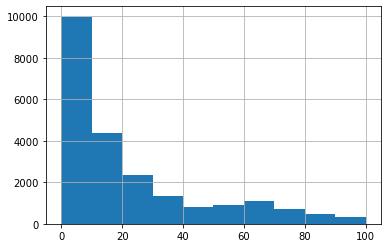

In [71]:
cars2['% premium'].hist()

In [78]:
percentage=((cars2['% premium'].value_counts(bins=10))/len(cars2))*100

In [79]:
percentage

(-0.101, 10.0]    45.609963
(10.0, 20.0]      19.042093
(20.0, 30.0]      10.395929
(30.0, 40.0]       5.918850
(60.0, 70.0]       4.834174
(50.0, 60.0]       4.160157
(40.0, 50.0]       3.499531
(70.0, 80.0]       3.227246
(80.0, 90.0]       2.057760
(90.0, 100.0]      1.254296
Name: % premium, dtype: float64

- after excluding negative premiums and abnormal premiums, I found that the premiums were skewed heavily towards the lower end of the distribution i.e. about 65% of cars post-exclusion were sold at a premium of less than 30% with roughly 45% being sold at a premium of less than 10%
- This might be an indicator that the auction can be said to be efficient as the majority of the winning price is not that far from the reserve price set
- if not already implemented, providing consultation of what the market value of the cars being sold would improve the efficiency of the auction

- some drawbacks from this method of measuring efficiency of the auction is that only 92% of original dataset was used post-removal which can be considered quite wasteful, could possibly use a higher premium to set as the benchmark for abnormal premiums to reduce data removal